In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
import warnings
warnings.filterwarnings('ignore')


In [3]:
pd.set_option('display.max_rows', 10000)
pd.set_option('display.max_columns', 100)

In [4]:
import seaborn as sns
%matplotlib inline

In [5]:
dataset = pd.read_csv(r'C:\Users\ANUBHAV CHAUHAN\Desktop\MachineLearning Project\ML Project1_BMP\bank-marketing.csv')

In [6]:
dataset.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   salary     45211 non-null  int64 
 3   marital    45211 non-null  object
 4   education  45211 non-null  object
 5   targeted   45211 non-null  object
 6   default    45211 non-null  object
 7   balance    45211 non-null  int64 
 8   housing    45211 non-null  object
 9   loan       45211 non-null  object
 10  contact    45211 non-null  object
 11  day        45211 non-null  int64 
 12  month      45211 non-null  object
 13  duration   45211 non-null  int64 
 14  campaign   45211 non-null  int64 
 15  pdays      45211 non-null  int64 
 16  previous   45211 non-null  int64 
 17  poutcome   45211 non-null  object
 18  response   45211 non-null  object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [8]:
# iterated through dataset and stored data with datatype as 'object' to new variable cat_col

cat_col = [n for n in dataset.columns if dataset[n].dtypes == 'object']

In [9]:
#obtain the value count of each column holding a categorical data 

for col in cat_col:
    print(col, '\n\n')
    print(dataset[col].value_counts())
    print("======================" * 4)

job 


blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
marital 


married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
education 


secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
targeted 


yes    37091
no      8120
Name: targeted, dtype: int64
default 


no     44396
yes      815
Name: default, dtype: int64
housing 


yes    25130
no     20081
Name: housing, dtype: int64
loan 


no     37967
yes     7244
Name: loan, dtype: int64
contact 


cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
month 


may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
ma

In [10]:
dataset.isnull().sum()

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [11]:
dataset.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [12]:
dataset.corr()

,age,salary,balance,day,duration,campaign,pdays,previous
age,1.000000,0.024357,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
salary,0.024357,1.000000,0.055469,0.027864,-0.009937,0.015005,-0.014968,0.014564
balance,0.097783,0.055469,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.027864,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,-0.009937,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,0.015005,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,-0.014968,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.014564,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


### Exploring Categorical Columns

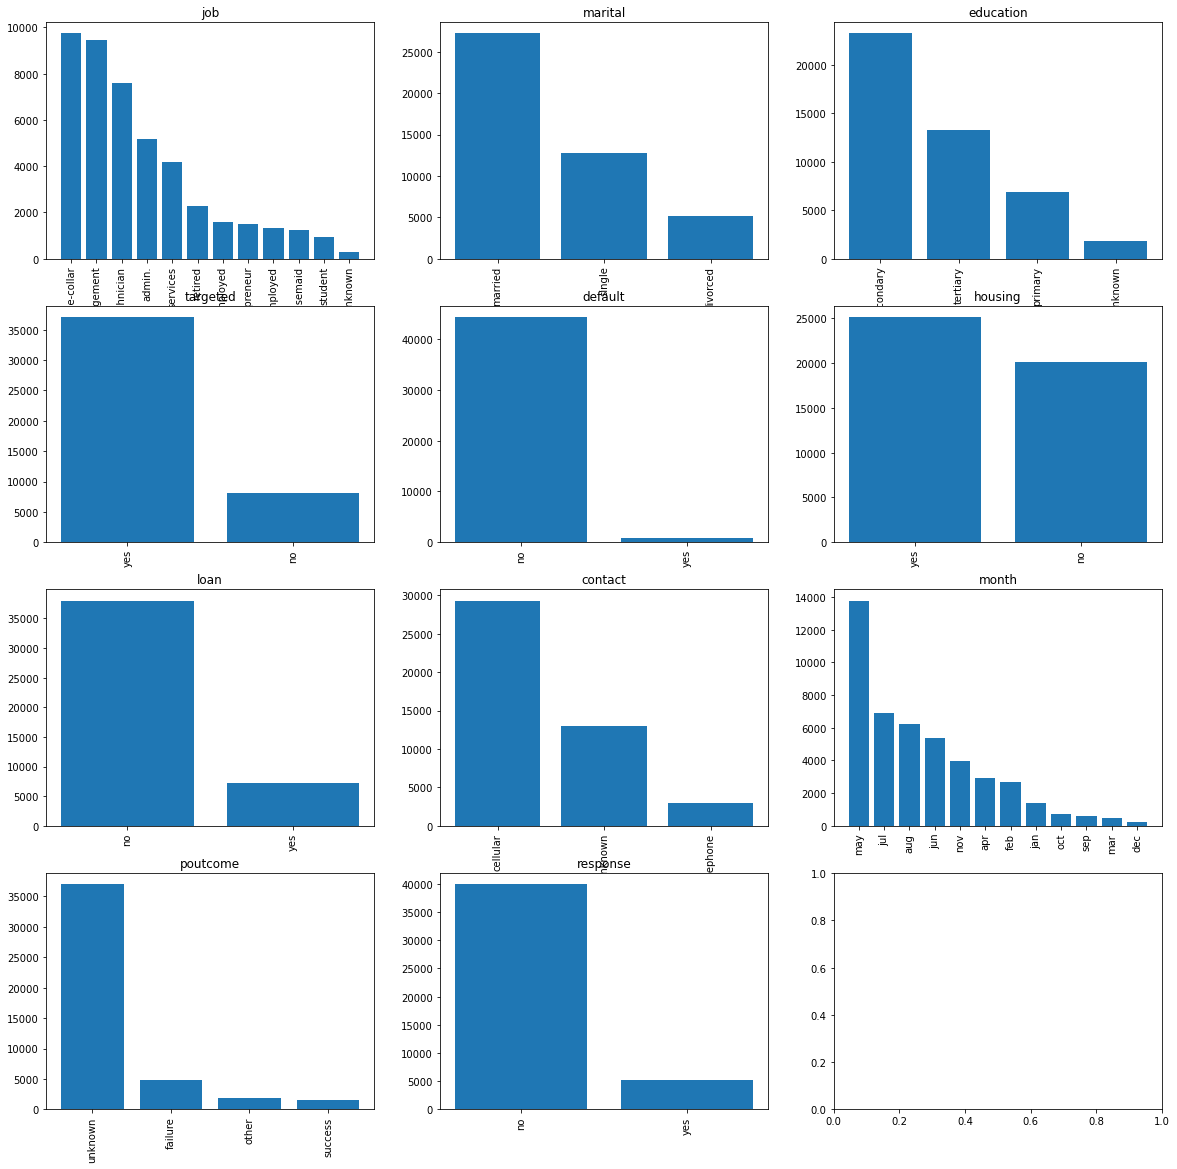

In [13]:
cat_columns = ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month','poutcome', 'response']

fig, axs = plt.subplots(4, 3, sharex=False, sharey=False, figsize=(20, 20))

counter = 0
for cat_column in cat_columns:
    value_counts = dataset[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

### Exploring numerical columns

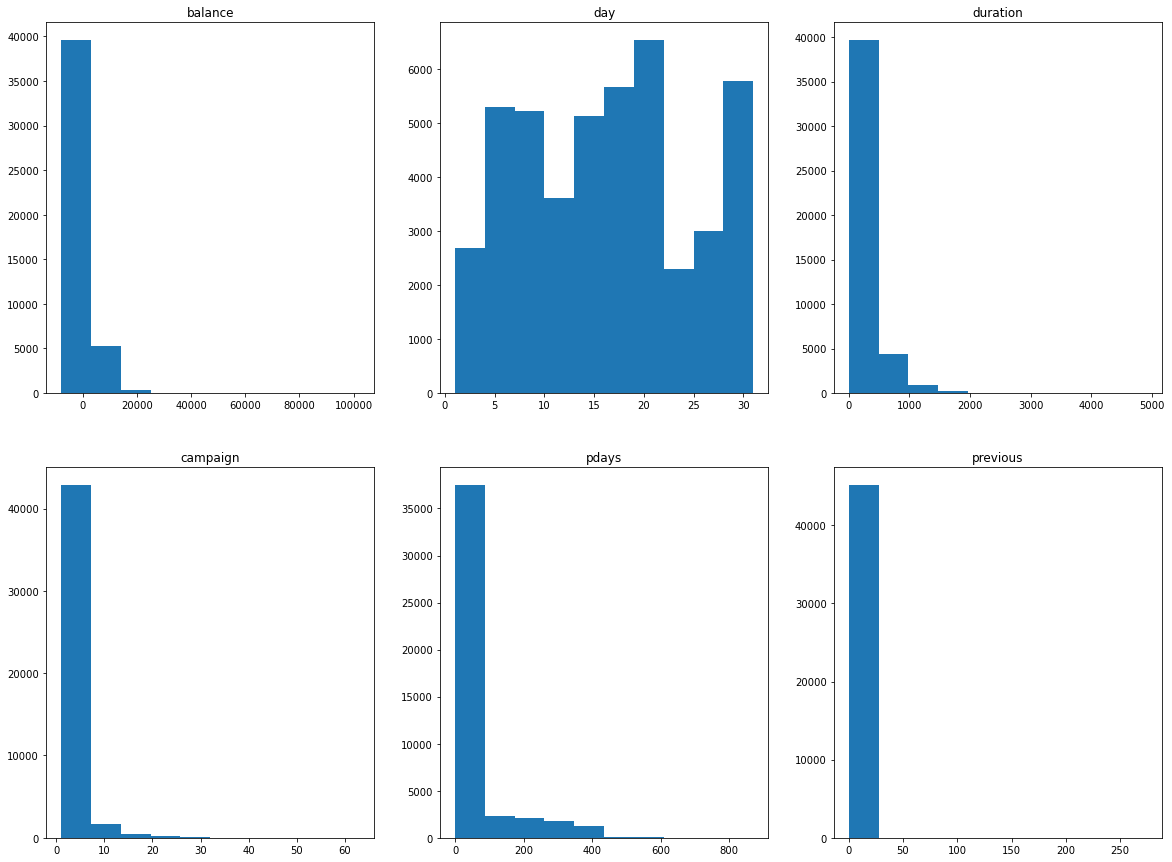

In [14]:
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(dataset[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

### We can see that numerical columns have outliers, especially 'pdays', and 'campaign' columns. Possibly there are incorrect values(noisy data), so we should look closer at the data and decide how do we manage the noise. lets look closer at pdays and campaign.

In [15]:
dataset[['pdays', 'campaign']].describe()

,pdays,campaign
count,45211.000000,45211.000000
mean,40.197828,2.763841
std,100.128746,3.098021
min,-1.000000,1.000000
25%,-1.000000,1.000000
50%,-1.000000,2.000000
75%,-1.000000,3.000000
max,871.000000,63.000000


#### Percentage of 'pdays' values above 400:

In [16]:
len (dataset[dataset['pdays'] > 400] ) / len(dataset) *100

0.5175731569750724

#### Perrcentage of 'pdays' values of -1:

In [17]:
len (dataset[dataset['pdays'] == -1] ) / len(dataset) *100

81.73674548229414

### pdays : number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

### Note: Mean(pdays) = 40.19, Median(pdays) = -1.0, Minimum(pdays) = -1.0

### Looking closer into 'pdays' data we can see that:
#### 1. only 0.51% of values above 400. They are possibly outliers, so we should consider imputing something (possibly mean value) instead of these values.
#### 2. -1 possibly means that the client wasn't contacted before or stands for missing data. , so I will replace -1 by 999 as written in dataset description.


#### - Plot a horizontal bar graph with the median values of balance for each education level value. Which group has the highest median?

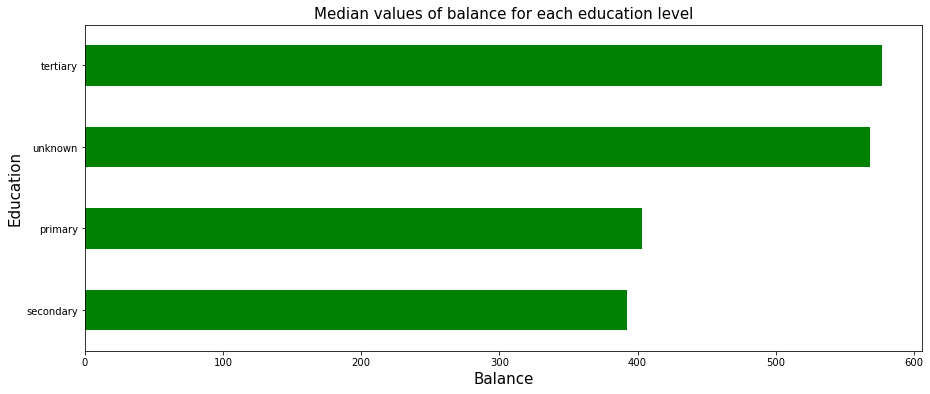

In [18]:
edu = dataset.groupby('education')['balance'].median().sort_values().plot(kind = 'barh', color = 'green', figsize = (15,6))
edu.set_xlabel('Balance',fontsize = 15)
edu.set_ylabel('Education',fontsize = 15)
edu.set_title('Median values of balance for each education level',fontsize = 15)
plt.show()

### 'tertiary' group has the highest median

### - Make a box plot for pdays. Do you see any outliers?

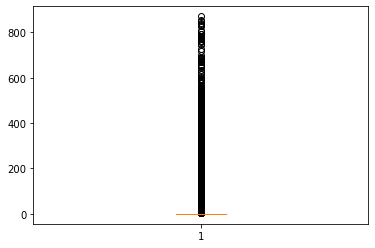

<Figure size 1080x432 with 0 Axes>

In [19]:
plt.boxplot(dataset['pdays'])
fig = plt.figure(figsize =(15,6))
plt.show()

#### As we can see above pdays contains too much noise in data.

### @ Analysis of the response variable

#### It is very important to look at the response column, which holds the information, which we are going to predict. In our case we should compare its values to other columns.
#### First of all we should look at the number of 'yes' and 'no' values in the response column .

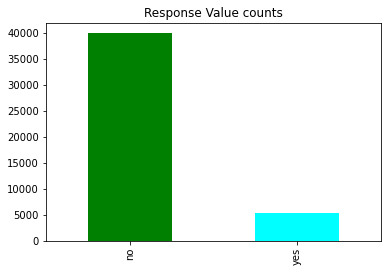

In [20]:
value_counts.plot.bar(title = 'Response Value counts', color=('green','cyan'))

plt.show()

In [21]:
dataset['response'].value_counts()

no     39922
yes     5289
Name: response, dtype: int64

### As we can observe from the above figure that 'no' and 'yes' varies too much from each other. 
#### yes constitutes to 11.7% from the overall response variable and no constitutes to 88.3%. 
### Therefore this scenerio represents a case of Imbalanced class.  Imbalanced Classes arises from classification problems where the classes are not represented equally.
### So, I will use confusion metric for accuracy of the model with precision, recall, F1 score, MCC and then I will compare each of the metric for the best accuracy metric.

###  @ Performing bi-variate analysis to identify the features that are directly associated with the target variable. 

#### Let's see how 'response' column value varies depending on other categorical columns' values:

#### Visualization

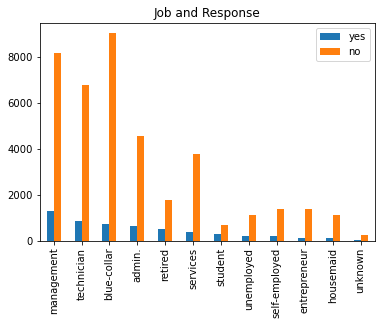

In [22]:
# Job and Response
job_res = pd.DataFrame()

job_res['yes'] = dataset[dataset['response'] == 'yes']['job'].value_counts()
job_res['no'] = dataset[dataset['response'] == 'no']['job'].value_counts()

job_res.plot.bar(title = 'Job and Response')

#### The job of a user can influence the final result of the dependent variable because they obviously earn different salaries. Intuitively, we know a user who has a blue-collar, management, technician job has a high tendency of subscribing to the next campaign than an unemployed person.


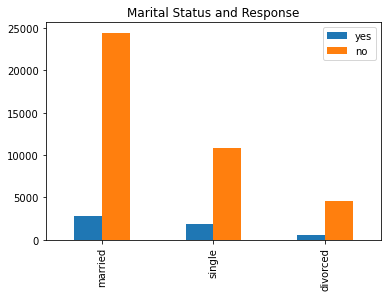

In [23]:
# marital status and response
m_res = pd.DataFrame()

m_res['yes'] = dataset[dataset['response'] == 'yes']['marital'].value_counts()
m_res['no'] = dataset[dataset['response'] == 'no']['marital'].value_counts()

m_res.plot.bar(title = 'Marital Status and Response')

#### Married person has high tendency of subscribing to the next campaign and divorced tends to less interested in subscribing.

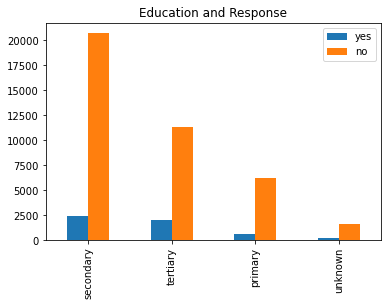

In [24]:
# education and response
edu_res = pd.DataFrame()

edu_res['yes'] = dataset[dataset['response'] == 'yes']['education'].value_counts()
edu_res['no'] = dataset[dataset['response'] == 'no']['education'].value_counts()

edu_res.plot.bar(title = 'Education and Response')

#### Also the education of the user is also an influence to our dependent variable. we can see from the plot that secondary and tertiary educated people has both the most user with both sub (yes) and no_sub (no). while the unknown have the least which is normal.

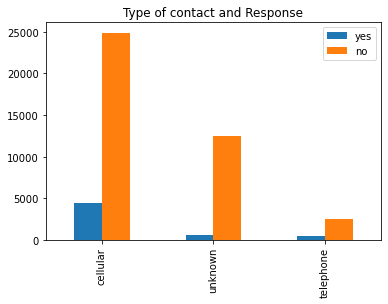

In [25]:
# Type of contact and response
con_res = pd.DataFrame()

con_res['yes'] = dataset[dataset['response'] == 'yes']['contact'].value_counts()
con_res['no'] = dataset[dataset['response'] == 'no']['contact'].value_counts()

con_res.plot.bar(title = 'Type of contact and Response')

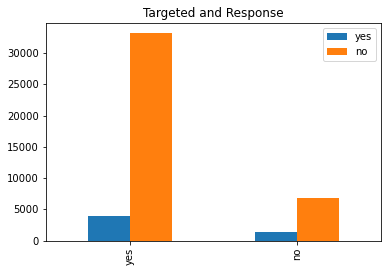

In [26]:
#target and response

tar_res = pd.DataFrame()

tar_res['yes'] = dataset[dataset['response'] == 'yes']['targeted'].value_counts()
tar_res['no'] = dataset[dataset['response'] == 'no']['targeted'].value_counts()

tar_res.plot.bar(title = 'Targeted and Response')

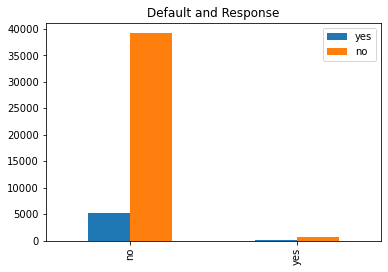

In [27]:
# default and response
def_res = pd.DataFrame()

def_res['yes'] = dataset[dataset['response'] == 'yes']['default'].value_counts()
def_res['no'] = dataset[dataset['response'] == 'no']['default'].value_counts()

def_res.plot.bar(title = 'Default and Response')

#### The user credit is in default or not is also an influence on our target variable. As we can see that the person whose credit is not in default has both the most user with both sub (yes) and no_sub (no).

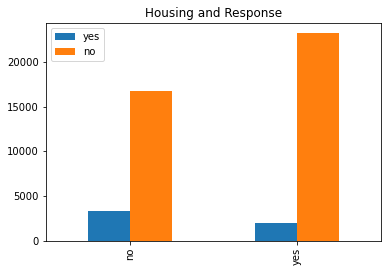

In [28]:
# housing and response
hs_res = pd.DataFrame()

hs_res['yes'] = dataset[dataset['response'] == 'yes']['housing'].value_counts()
hs_res['no'] = dataset[dataset['response'] == 'no']['housing'].value_counts()

hs_res.plot.bar(title = 'Housing and Response')

#### As we can see the clients has housing loan tends to less subsribed to term deposit than who does'nt have housing loan. 

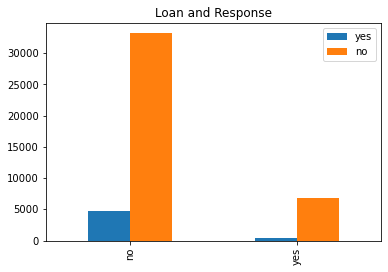

In [29]:
# loan and response
l_res = pd.DataFrame()

l_res['yes'] = dataset[dataset['response'] == 'yes']['loan'].value_counts()
l_res['no'] = dataset[dataset['response'] == 'no']['loan'].value_counts()

l_res.plot.bar(title = 'Loan and Response')

#### As we can observe above the clients that have no personal loan has both the most user with both sub (yes) and no_sub (no).

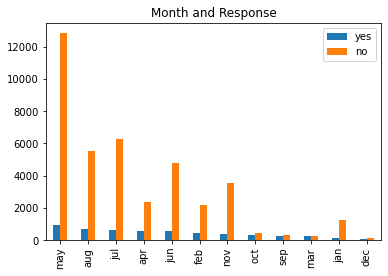

In [30]:
# Month and Response
mon_res = pd.DataFrame()

mon_res['yes'] = dataset[dataset['response'] == 'yes']['month'].value_counts()
mon_res['no'] = dataset[dataset['response'] == 'no']['month'].value_counts()

mon_res.plot.bar(title = 'Month and Response')

#### As we can see that in may,jul,aug most of the subscriptions happened, while in sep, oct there were very least subscriptions and in dec there where not at all any subcriptions.

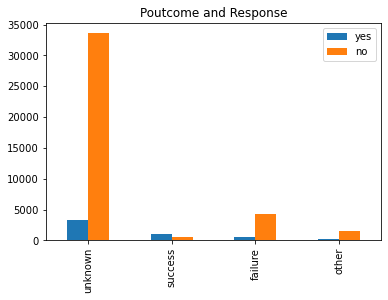

In [31]:

pout_res = pd.DataFrame()

pout_res['yes'] = dataset[dataset['response'] == 'yes']['poutcome'].value_counts()
pout_res['no'] = dataset[dataset['response'] == 'no']['poutcome'].value_counts()

pout_res.plot.bar(title = 'Poutcome and Response')

In [32]:
len (dataset[dataset['poutcome'] == 'unknown'] ) / len(dataset) *100

81.74780473778506

#### As we can in poutcome 80% of the data is unknown so we drop this column.

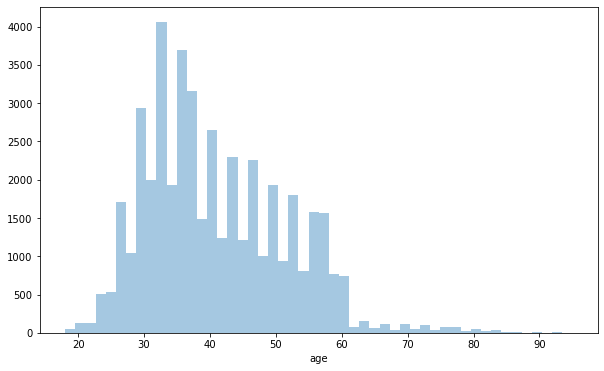

In [33]:
plt.figure(figsize = (10,6))
sns.distplot(a = dataset['age'], kde = False)

#### from the distplot above on our independent variable ‘age’, we can tell that most of the users are within the age 30 - 45. and we have less users from 60 upward

### @ Convert the response variable to a convenient form

In [34]:
dataset.response.replace(('yes','no'),(1,0),inplace = True)

In [35]:
dataset['response'].head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: response, dtype: int64

#### Are the features about the previous campaign data useful?

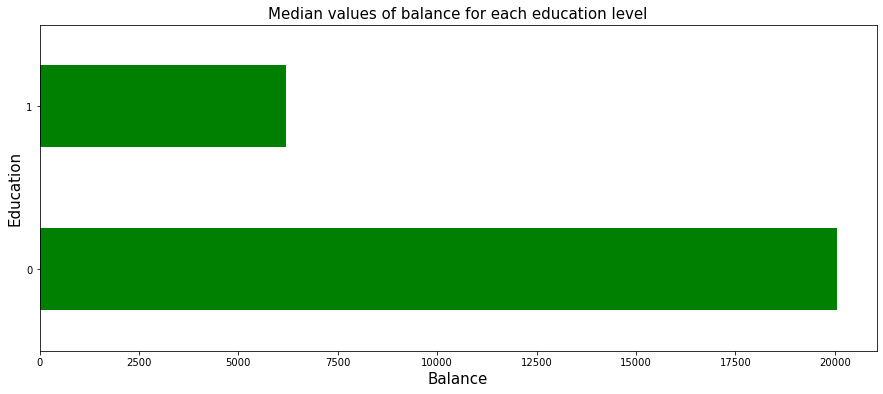

In [36]:
edu = dataset.groupby('response')['previous'].sum().plot(kind = 'barh', color = 'green', figsize = (15,6))
edu.set_xlabel('Balance',fontsize = 15)
edu.set_ylabel('Education',fontsize = 15)
edu.set_title('Median values of balance for each education level',fontsize = 15)
plt.show()

#### yes, features about the 'previous' campaign data is useful as it tells that after the no. of calls performed before this campaign, the client subscribes for term deposit or not.

### @ Are pdays and poutcome associated with the target? If yes, and if you plan to use them – how do you handle the pdays column with a value of -1 where the previous campaign data is missing? Explain your approach and your decision.

In [37]:
#first of all replacing -1 with 999 in pdays as written in dataset description that 999 means client was not previously contacted.
dataset.pdays.replace((-1),(999), inplace = True)

In [38]:
from scipy.stats import pearsonr

corr, _ = pearsonr(dataset['pdays'], dataset['response'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.179


#### --> From the above pearsons correlation we can say that pdays has small negative linear correlation with response variable.

#### --> From the above barplot where we were checking association of poutcome with response variable we can say that 80% of the data is unknown, therefore I dont think it will help in our predictions and in model, therefore I will drop it.

#### --> Yes, I plan to use pdays column, and what I have done is, I have replaced -1 with 999 that means client was not previously contacted.

### Data cleaning

In [39]:
# dropping poutcome
dataset = pd.DataFrame(dataset)
dataset.drop(['poutcome'], axis = 1, inplace = True) 


In [40]:
#I have also imputed -1 value of pdays, I have replaced it with 999.

### Feature Engineering

In [41]:
# dataset shape before creating dummy variable for categorical data
dataset.shape

(45211, 18)

In [42]:
dataset1 = dataset

In [43]:
# storing our dummy variable data in new variable dataset_new
# Here I am creating dummy variable for categorical data.
dataset_new = pd.get_dummies(dataset,columns = ['job','marital','education','targeted','default',
                                   'housing','loan','contact','month'], drop_first = True)

In [44]:
dataset_new.shape

(45211, 42)

In [45]:
dataset_new

,age,salary,balance,day,duration,campaign,pdays,previous,response,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,targeted_yes,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,100000,2143,5,261,1,999,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
1,44,60000,29,5,151,1,999,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,33,120000,2,5,76,1,999,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0
3,47,20000,1506,5,92,1,999,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0
4,33,0,1,5,198,1,999,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,60000,825,17,977,3,999,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45207,71,55000,1729,17,456,2,999,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45208,72,55000,5715,17,1127,5,184,3,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
45209,57,20000,668,17,508,4,999,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [46]:
dataset_new1 = dataset_new

### Seperating data in independent and dependent variables

In [47]:
X = dataset_new1.loc[:,dataset_new1.columns != 'response']
y = dataset_new1.loc[:,dataset_new1.columns == 'response']

In [48]:
y.shape

(45211, 1)

### Splitting the dataset into training set and testing set


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [50]:
#print lenght of both test and train set
print('shape of X_train : ',len(X_train), '\nshape of y_train : ',len(y_train))
print('\nshape of X_test  : ',len(X_test), '\nshape of y_test  : ',len(y_test))

shape of X_train :  33908 
shape of y_train :  33908

shape of X_test  :  11303 
shape of y_test  :  11303


In [51]:
print(X_train)

       age  salary  balance  day  duration  campaign  pdays  previous  \
33362   39   70000     3870   20        72         1    999         0   
28229   31  100000     1073   29        82         1    999         0   
37952   36   50000      886   14       362         6    999         0   
43408   19    4000      394    5       327         3    999         0   
9897    45   16000        0    9       100         1    999         0   
...    ...     ...      ...  ...       ...       ...    ...       ...   
30403   35  100000      995    5        39         1    999         0   
21243   35  100000      750   18       233        12    999         0   
42613   35  100000      323   11       261         2    999         0   
43567   70   55000      616   27       149         2    182         1   
2732    46   20000       57   14       194         4    999         0   

       job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
33362                0                 0        

In [52]:
print(X_test)

       age  salary  balance  day  duration  campaign  pdays  previous  \
14001   37  100000     1403   10        91        15    999         0   
32046   36   70000     -253   14      1073         1    999         0   
13318   47   20000     -406    8       243         5    999         0   
42991   57   16000      501   11       105         7    188         2   
14237   33   20000     -406   14       332         2    999         0   
...    ...     ...      ...  ...       ...       ...    ...       ...   
9953    37   50000     3913    9        76         2    999         0   
37898   36   70000     -267   14        99         7    352         1   
1080    37   60000        0    7       112         4    999         0   
17950   41  100000      636   30        80         2    999         0   
20575   49  100000     4751   12       884         4    999         0   

       job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
14001                0                 0        

In [53]:
print(y_train)

       response
33362         0
28229         0
37952         0
43408         1
9897          0
...         ...
30403         0
21243         0
42613         1
43567         0
2732          0

[33908 rows x 1 columns]


In [54]:
print(y_test)

       response
14001         0
32046         1
13318         0
42991         0
14237         0
...         ...
9953          0
37898         0
1080          0
17950         0
20575         1

[11303 rows x 1 columns]


### Feature Scaling 

In [55]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [56]:
print(X_train)

[[-0.18276354  0.39923449  0.80402975 ... -0.31291337 -0.12781026
  -0.11225988]
 [-0.93754659  1.33362363 -0.09711178 ... -0.31291337 -0.12781026
  -0.11225988]
 [-0.46580719 -0.22369161 -0.15735971 ... -0.31291337 -0.12781026
  -0.11225988]
 ...
 [-0.56015507  1.33362363 -0.33874787 ... -0.31291337 -0.12781026
  -0.11225988]
 [ 2.74202077 -0.06796008 -0.2443487  ... -0.31291337 -0.12781026
  -0.11225988]
 [ 0.47767162 -1.15808075 -0.42444813 ... -0.31291337 -0.12781026
  -0.11225988]]


In [57]:
print(X_test)

[[-0.3714593   1.33362363  0.0092081  ... -0.31291337 -0.12781026
  -0.11225988]
 [-0.46580719  0.39923449 -0.52432439 ... -0.31291337 -0.12781026
  -0.11225988]
 [ 0.5720195  -1.15808075 -0.57361815 ... -0.31291337 -0.12781026
  -0.11225988]
 ...
 [-0.3714593   0.08777144 -0.44281248 ... -0.31291337 -0.12781026
  -0.11225988]
 [ 0.00593222  1.33362363 -0.23790507 ... -0.31291337 -0.12781026
  -0.11225988]
 [ 0.76071527  1.33362363  1.08787161 ... -0.31291337 -0.12781026
  -0.11225988]]


## Predictive model 1: Logistic regression
### Training the Logistic Regression Model on the Training set

In [58]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)


LogisticRegression(random_state=0)

In [59]:
#Training accuracy
classifier.score(X_train, y_train)

0.8972513861035744

In [60]:
# Testing accuracy
classifier.score(X_test, y_test)

0.894895160576838

In [61]:
y_pred = classifier.predict(X_test)
#print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

### Making the Confusion Matrix

In [62]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9720  258]
 [ 930  395]]


0.894895160576838

In [63]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9978
           1       0.60      0.30      0.40      1325

    accuracy                           0.89     11303
   macro avg       0.76      0.64      0.67     11303
weighted avg       0.88      0.89      0.88     11303



### Now I will give a try for decision tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [66]:
#Training Accuracy 
classifier.score(X_train, y_train)

1.0

In [67]:
#Testing Accuracy
classifier.score(X_test, y_test)

0.8662302043705211

In [68]:
y_pred = classifier.predict(X_test)

In [69]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9189  789]
 [ 723  602]]


0.8662302043705211

In [70]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.92      0.92      9978
           1       0.43      0.45      0.44      1325

    accuracy                           0.87     11303
   macro avg       0.68      0.69      0.68     11303
weighted avg       0.87      0.87      0.87     11303



### Now i will make my data more clean and then again train and test my model accuracy

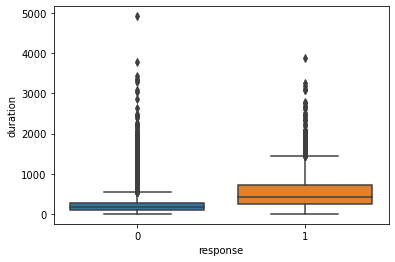

In [71]:
# Checking for outliers
sns.boxplot(x = 'response', y='duration', data=dataset_new1)

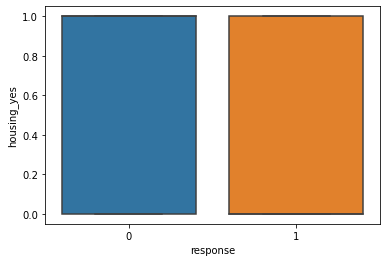

In [72]:
sns.boxplot(x = 'response', y='housing_yes', data=dataset_new1)

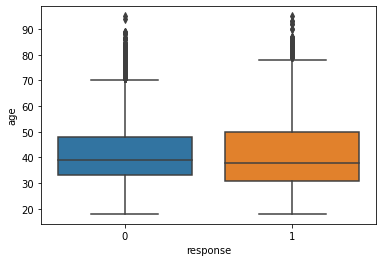

In [73]:
sns.boxplot(x = 'response', y='age', data=dataset_new1)

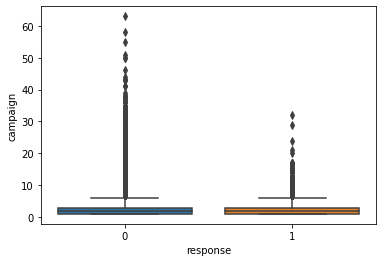

In [74]:
sns.boxplot(x = 'response', y='campaign', data=dataset_new1)

In [75]:
# Removing Outliers
def remove_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [76]:
len(dataset_new1['duration'])

45211

In [77]:
min_val = dataset_new1["duration"].min()
max_val = 1500
dataset_new1 = remove_outliers(df=dataset_new1, column='duration' , minimum=min_val, maximum=max_val)

min_val = dataset_new1["age"].min()
max_val = 80
dataset_new1 = remove_outliers(df=dataset_new1, column='age' , minimum=min_val, maximum=max_val)

min_val = dataset_new1["campaign"].min()
max_val = 6
dataset_new1 = remove_outliers(df=dataset_new1, column='campaign' , minimum=min_val, maximum=max_val)


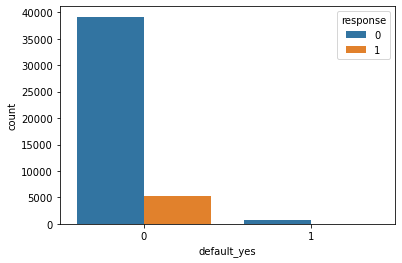

In [78]:
# dropping less meaningfull data
sns.countplot(x='default_yes',hue='response',data=dataset_new1)

In [79]:
# it is skewed  to zero, so i am dropping this.
dataset_new1 = dataset_new1.drop('default_yes', axis = 1)

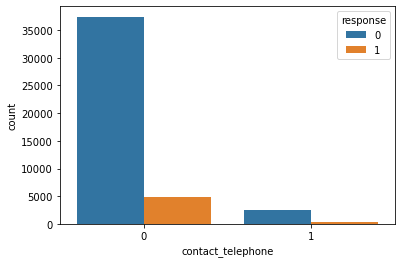

In [80]:
sns.countplot(x='contact_telephone',hue='response',data=dataset_new1)

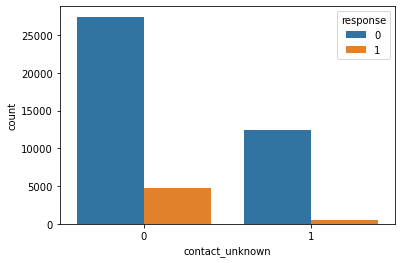

In [81]:
sns.countplot(x='contact_unknown',hue='response',data=dataset_new1)

In [82]:
dataset_new1 = dataset_new1.drop('contact_telephone', axis = 1)

In [83]:
dataset_new1 = dataset_new1.drop('contact_unknown', axis = 1)

In [84]:
dataset_new1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  float64
 1   salary               45211 non-null  int64  
 2   balance              45211 non-null  int64  
 3   day                  45211 non-null  int64  
 4   duration             45211 non-null  float64
 5   campaign             45211 non-null  float64
 6   pdays                45211 non-null  int64  
 7   previous             45211 non-null  int64  
 8   response             45211 non-null  int64  
 9   job_blue-collar      45211 non-null  uint8  
 10  job_entrepreneur     45211 non-null  uint8  
 11  job_housemaid        45211 non-null  uint8  
 12  job_management       45211 non-null  uint8  
 13  job_retired          45211 non-null  uint8  
 14  job_self-employed    45211 non-null  uint8  
 15  job_services         45211 non-null 

In [85]:
# Again splitting
X = dataset_new1.loc[:,dataset_new1.columns != 'response']
y = dataset_new1.loc[:,dataset_new1.columns == 'response']
# Training testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#creating logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

#predicting X_test data
y_pred = classifier.predict(X_test)




In [86]:
#confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[9708  270]
 [ 929  396]]


0.8939219676192162

In [87]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9978
           1       0.59      0.30      0.40      1325

    accuracy                           0.89     11303
   macro avg       0.75      0.64      0.67     11303
weighted avg       0.88      0.89      0.88     11303



### --> After removing outliers and dropping less meaningfull data accuracy of the model and classification report of the model remains same.

## - Using RFE to select top n features in an automated fashion (choose n as you see fit)

In [88]:
# importing necessary libary for RFE
from sklearn.feature_selection import RFE


model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 15)
fit = rfe.fit_transform(X, y)
model.fit(fit,y)
print("Num Features: %d" % rfe.n_features_)
print("Selected Features: %s" % rfe.support_)
print("Feature Ranking: %s" % rfe.ranking_)


Num Features: 15
Selected Features: [False False False False False False False False False False  True False
 False False False  True False False False False False False False False
 False  True  True  True  True  True  True  True  True  True  True  True
  True  True]
Feature Ranking: [17 24 23 19 18  8 21 15  9  7  1 14  2 12 11  1 13 20 22  4 10  5  3  6
 16  1  1  1  1  1  1  1  1  1  1  1  1  1]


### Here I have too LogisticRegression model with 15 features and RFE gave feature ranking above, but the selection of number '15' was random. Now we need to find the optimum number of features, for which the accuracy is the highest. This will be done by using loop starting with 1 feature and going up to 39. we then take the one for which the accuracy is highest.

In [89]:
# #no of features
# nof_list=np.arange(1,39)            
# high_score=0
# #Variable to store the optimum features
# nof=0           
# score_list =[]
# for n in range(len(nof_list)):
#     X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)
#     model = LogisticRegression()
#     rfe = RFE(model,nof_list[n])
#     X_train_rfe = rfe.fit_transform(X_train,y_train)
#     X_test_rfe = rfe.transform(X_test)
#     model.fit(X_train_rfe,y_train)
#     score = model.score(X_test_rfe,y_test)
#     score_list.append(score)
#     if(score>high_score):
#         high_score = score
#         nof = nof_list[n]
# print("Optimum number of features: %d" %nof)
# print("Score with %d features: %f" % (nof, high_score))

### As we can see from above that the optimum number of features is 34. Now I will feed 34 as number of features to RFE and get the final set of features given by RFE method, as follows:

In [90]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 34)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['age', 'day', 'duration', 'campaign', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'targeted_yes', 'housing_yes', 'loan_yes', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep'],
      dtype='object')


### Now I am going to create model on above features.

In [91]:
dataset_new1.drop(['salary','balance','pdays','job_unknown'],axis = 1, inplace = True)

In [92]:
dataset_new1.shape

(45211, 35)

In [93]:
# Again splitting
X = dataset_new1.loc[:,dataset_new1.columns != 'response']
y = dataset_new1.loc[:,dataset_new1.columns == 'response']


# Training testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#creating logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

#predicting X_test data
y_pred = classifier.predict(X_test)


#### --> - What is the precision, recall, accuracy of your model?


In [94]:

#confusion matrix and accuracy of my model
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[9722  256]
 [ 958  367]]


0.8925948863133681

In [95]:
# precision, recall of my model
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9978
           1       0.59      0.28      0.38      1325

    accuracy                           0.89     11303
   macro avg       0.75      0.63      0.66     11303
weighted avg       0.87      0.89      0.88     11303



### Using p values and VIF, get rid of the redundant features


In [96]:
#Adding constant column of ones, mandatory for sm.OLS model
import statsmodels.regression.linear_model as lm
import statsmodels.regression.linear_model as sm
import statsmodels.api as smm
X_1 = smm.add_constant(X)
#Fitting sm.OLS model
model = lm.OLS(y,X_1).fit()
model.pvalues

const                   1.360192e-08
age                     8.970006e-02
day                     7.701794e-03
duration                0.000000e+00
campaign                2.427393e-20
previous                1.208374e-62
job_blue-collar         7.886442e-06
job_entrepreneur        7.966228e-05
job_housemaid           2.973416e-05
job_management          2.700284e-02
job_retired             2.848952e-05
job_self-employed       9.300915e-03
job_services            1.935131e-02
job_student             3.307952e-18
job_technician          3.268164e-02
job_unemployed          9.233603e-01
marital_married         9.778333e-02
marital_single          1.375501e-02
education_secondary     7.681148e-03
education_tertiary      3.851354e-08
education_unknown       9.250537e-01
targeted_yes            6.295172e-02
housing_yes             5.833063e-82
loan_yes                6.261206e-20
month_aug               8.635288e-26
month_dec               1.173012e-24
month_feb               6.233734e-02
m

In [97]:

cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = smm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['day', 'duration', 'campaign', 'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'marital_single', 'education_secondary', 'education_tertiary', 'targeted_yes', 'housing_yes', 'loan_yes', 'month_aug', 'month_dec', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep']


### Above are the redundant features we get using pvalues

## Now again creating model using redundant features

In [98]:
# Again splitting
X = X.loc[:, ['day', 'duration', 'campaign', 'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'marital_single', 'education_secondary', 'education_tertiary', 'targeted_yes', 'housing_yes', 'loan_yes', 'month_aug', 'month_dec', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep']]
y = dataset.loc[:,['response']]

from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

# Training testing split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# #feature scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

#creating logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

#predicting X_test data
y_pred = classifier.predict(X_test)


In [99]:

#confusion matrix and accuracy of my model
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)


[[9723  255]
 [ 960  365]]


0.8925064142263116

In [100]:
# precision, recall of my model
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      9978
           1       0.59      0.28      0.38      1325

    accuracy                           0.89     11303
   macro avg       0.75      0.62      0.66     11303
weighted avg       0.87      0.89      0.87     11303



### Estimate the model performance using k fold cross validation

In [101]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [102]:
# X = dataset_new1.loc[:,dataset_new1.columns != 'response']
# y = dataset_new1.loc[:,dataset_new1.columns == 'response']
X = X.loc[:, ['day', 'duration', 'campaign', 'previous', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'marital_single', 'education_secondary', 'education_tertiary', 'targeted_yes', 'housing_yes', 'loan_yes', 'month_aug', 'month_dec', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep']]
y = dataset.loc[:,['response']]

from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f' % (mean(scores)))

Accuracy: 0.892


### My model accuracy is 89% and K-fold cross validation accuracy is 89%, not much difference, it means there is no overfitting or underfitting issue in my model and model is good.

#### --> - Which features are the most important from your model?


In [103]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 34)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print('The most important features from my model are....',selected_features_rfe)

The most important features from my model are.... Index(['day', 'duration', 'campaign', 'previous', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'marital_single', 'education_secondary', 'education_tertiary',
       'targeted_yes', 'housing_yes', 'loan_yes', 'month_aug', 'month_dec',
       'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep'],
      dtype='object')


### These are the most important feature from my model

### Predictive model 2: Random Forest

- Make a predictive model using random forest technique
- Use not more than 50 trees, and control the depth of the trees to prevent overfitting
- Estimate the model performance using k fold cross validation
- What is the precision, recall, accuracy of your model?
- Using the feature importance values from the Random Forest module, identify the most important features for the model

In [104]:
RF_dataset=dataset_new

In [105]:
X = RF_dataset.loc[:,RF_dataset.columns != 'response']
y = RF_dataset.loc[:,RF_dataset.columns == 'response']
y =y.to_numpy()
X = X.to_numpy()

In [106]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [107]:
print('shape of X_train : ',X_train.shape, '\nshape of y_train : ',y_train.shape)
print('\nshape of X_test  : ',X_test.shape, '\nshape of y_test  : ',y_test.shape)

shape of X_train :  (33908, 41) 
shape of y_train :  (33908, 1)

shape of X_test  :  (11303, 41) 
shape of y_test  :  (11303, 1)


In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Training the Random Forest Classification model on the Training set

In [109]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

### Predicting the Test results

In [110]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [1 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [1 1]]


### Making the Confusion Matrix

In [111]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[9697  281]
 [ 868  457]]


0.8983455719720428

### Now I will perform hyperparameter tuning to find best attributes and features to make my model better 

In [112]:
from sklearn.model_selection import RandomizedSearchCV

from scipy.stats import randint

est = RandomForestClassifier(n_jobs=-1)
rf_p_dist={'max_depth':[3,5,10,20],
              'n_estimators':[10,20,30,40,50],
              'max_features':randint(1,42),
               'criterion':['gini','entropy'],
               'bootstrap':[True,False],
               'min_samples_leaf':randint(1,10)
              }

In [113]:
def hypertuning_rscv(est, p_distr, nbr_iter,X,y):
    rdmsearch = RandomizedSearchCV(est, param_distributions=p_distr,
                                  n_jobs=-1, n_iter=nbr_iter, cv=9)
    #CV = Cross-Validation ( here using Stratified KFold CV)
    rdmsearch.fit(X,y)
    ht_params = rdmsearch.best_params_
    ht_score = rdmsearch.best_score_
    return ht_params, ht_score



In [114]:
# rf_parameters, rf_ht_score = hypertuning_rscv(est, rf_p_dist, 10, X, y)



In [115]:
# rf_parameters

In [116]:
# rf_ht_score

In [117]:
classifier=RandomForestClassifier(n_jobs=-1, n_estimators=40,bootstrap= True,criterion='entropy',max_depth=3,max_features=3,min_samples_leaf= 1)

classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, max_features=3,
                       n_estimators=40, n_jobs=-1)

In [118]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)



[[9978    0]
 [1325    0]]


In [119]:
## Cross Validation good for selecting models
from sklearn.model_selection import cross_val_score

cross_val=cross_val_score(classifier,X,y,cv=10,scoring='accuracy').mean()


In [120]:
cross_val

0.8830373143914081

### Estimate the model performance using k fold cross validation

In [121]:
X = RF_dataset.loc[:,RF_dataset.columns != 'response']
y = RF_dataset.loc[:,RF_dataset.columns == 'response']
y =y.to_numpy()
X = X.to_numpy()
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# create model
model = RandomForestClassifier(n_jobs=-1, n_estimators=40,bootstrap= True,criterion='entropy',max_depth=3,max_features=3,min_samples_leaf= 1)

# evaluate model
scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
# report performance
print('Accuracy: %.3f' % (mean(scores)))

Accuracy: 0.883


 ### My model accuracy is 89% and K-fold cross validation accuracy is 88%, not much difference, it means there is no overfitting or underfitting issue in my model and my randomForestClassifier model is good.

### - What is the precision, recall, accuracy of your model?


In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      9978
           1       0.00      0.00      0.00      1325

    accuracy                           0.88     11303
   macro avg       0.44      0.50      0.47     11303
weighted avg       0.78      0.88      0.83     11303



In [123]:
print('Accuracy is....',accuracy_score(y_test,y_pred))

Accuracy is.... 0.8827744846500929


### - Using the feature importance values from the Random Forest module, identify the most important features for the model


Feature: 0, Score: 0.04725
Feature: 1, Score: 0.00817
Feature: 2, Score: 0.04583
Feature: 3, Score: 0.01151
Feature: 4, Score: 0.20201
Feature: 5, Score: 0.01953
Feature: 6, Score: 0.11376
Feature: 7, Score: 0.09515
Feature: 8, Score: 0.02350
Feature: 9, Score: 0.00018
Feature: 10, Score: 0.00001
Feature: 11, Score: 0.00087
Feature: 12, Score: 0.00968
Feature: 13, Score: 0.00049
Feature: 14, Score: 0.00174
Feature: 15, Score: 0.00600
Feature: 16, Score: 0.00012
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.00167
Feature: 19, Score: 0.00466
Feature: 20, Score: 0.00556
Feature: 21, Score: 0.00182
Feature: 22, Score: 0.01186
Feature: 23, Score: 0.00041
Feature: 24, Score: 0.01018
Feature: 25, Score: 0.00018
Feature: 26, Score: 0.07535
Feature: 27, Score: 0.01403
Feature: 28, Score: 0.00023
Feature: 29, Score: 0.08158
Feature: 30, Score: 0.00101
Feature: 31, Score: 0.00545
Feature: 32, Score: 0.00000
Feature: 33, Score: 0.00005
Feature: 34, Score: 0.00085
Feature: 35, Score: 0.00009
Fe

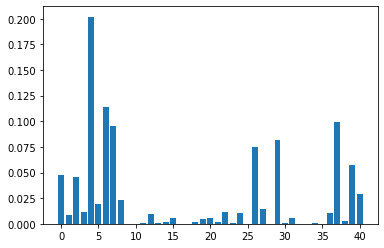

In [124]:


from matplotlib import pyplot

model = RandomForestClassifier(n_jobs=-1, n_estimators=40,bootstrap= True,criterion='entropy',max_depth=3,max_features=3,min_samples_leaf= 1, random_state=0)
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
l1=[]
l0=[]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
    l1.append(v);
    l0.append(i);
print(mean(l1))

# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [125]:
#for x in enumerate(importance):
for a,b in enumerate(importance):
    if b >= 0.024390243902439025:
            print(a,b)

0 0.04725487577519889
2 0.04583127366973976
4 0.20200928230197474
6 0.11375836498807923
7 0.09514798007395084
26 0.07535376112795009
29 0.08158330191005177
37 0.09902129106759831
39 0.0575985784583549
40 0.02862731312878781


## Above are the important features from my model

### Compare the performance of the Random Forest and the logistic model –
- Evaluate both models on the test set
- Which metric did you choose and why?
- Which model has better performance on the test set?
- Compare the feature importance from the different models – do they agree? Are the top features similar in both models?

## Evaluation of both models :

### Logistic Regression Model Evaluation
- Accuracy is 89% for logistic regression model that means number of correct predictions out of total predictions are 89%.
- K-fold cross validation accuracy with 10 splits = 88%
- Precision for non-subscribers = 91%
- Precision for subscribers = 59%
- recall for non-subscribers = 94%
- recall for subscribers = 28%
- F1-Score for non-subscribers of term deposit is 94% and F1-Score for subscribers of term deposit is 38% for my Logistic regression model.

### RandomForest Evaluation
- Accuracy is 88% that means number of correct predictions out of total predictions are 88%.
- Cross Validation Score = 88%
- K-fold cross validation score with 10 splits = 88%
- Precision for non-subscribers = 88%
- Precision for subscribers = 0%
- recall for non-subscribers = 100%
- recall for subscribers = 0%
- F1-Score for non-subscribers of term deposit is 94% and F1-Score for subscribers of term deposit is 0% for my RandomForest Classification model.

## The Metric I choose and why:....

### For both model evaluation I have choose Accuracy, K-fold Cross-validation, recall, precision, and F1-score.
### we can easily get extremely good accuracy but its not a good measure to evaluate the models, therefore with that I have also done K-fold cross validation, using k-fold cv accuracy we can say that if accuracy and k-fold accuracy varies too much than our model is not good, but if it is not varying too much then we can say that our model is good.
### Then I have calculated precision, recall, and F1-score, but I prefer F1-score, as it uses harmonic mean of models precision and recall.
- F1-score uses harmonic mean because it is not sensitive to extremely large values, unline simple averages.
- Thus F1-score is a better measure to use if you are seeking a better measure to use if you are seeking a balance between Precision and Recall.

## The model that has better performance on Test Set is.....

###
- The model that has better performance on test set is Logistic Regression model because as we can see above in both evaluation reports, Logistic Regression model is doing better than RandomForestClassification model.
- We have a good score in evaluation metrics of logistic regression for both subscribers and non-subscribers of term deposit.
- But in case of RandomForestClassifier model it has a good score in only for non-subscribers of term deposit and has no score for subscribers in recall, preicision, and F1-score.
- Therefore I would prefer Logistic Regression model over RandomForestClassification model